# Simple neural networks

## Manual gradient descent

In [1]:
from sklearn import datasets

df, y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)
df
# From 1990 census data at the city block level

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [2]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

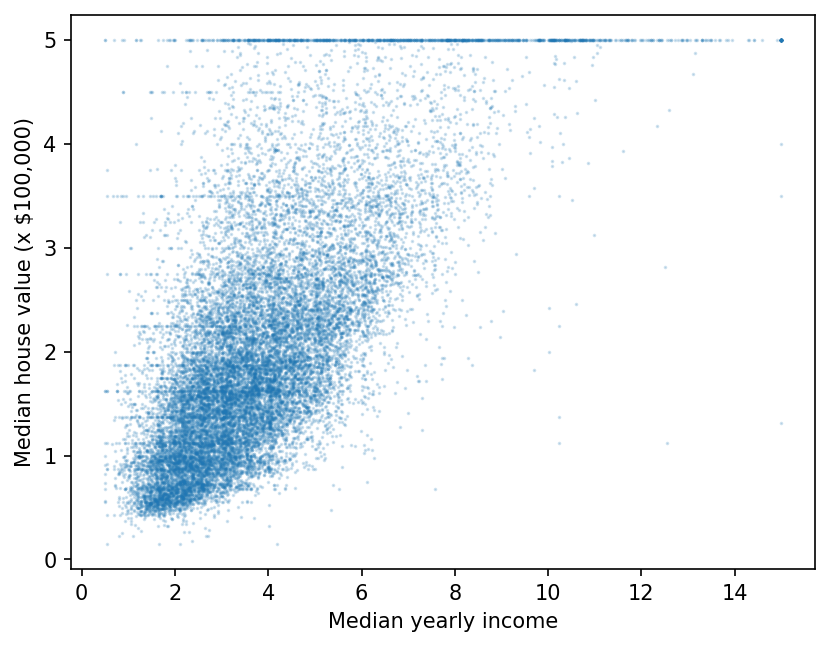

In [3]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.xlabel('Median yearly income')  # Per city block
plt.ylabel('Median house value (x $100,000)')
plt.scatter(df.MedInc, y, s=.5, alpha=.2)
plt.show()

Basic idea:

* We'd like to do linear regression
* Start with a randomly initialized model
  * Here just m*x + b (parameters *m* and *x*)
* Figure out how much each parameter contributes to errors
* Update the parameters accordingly, try again

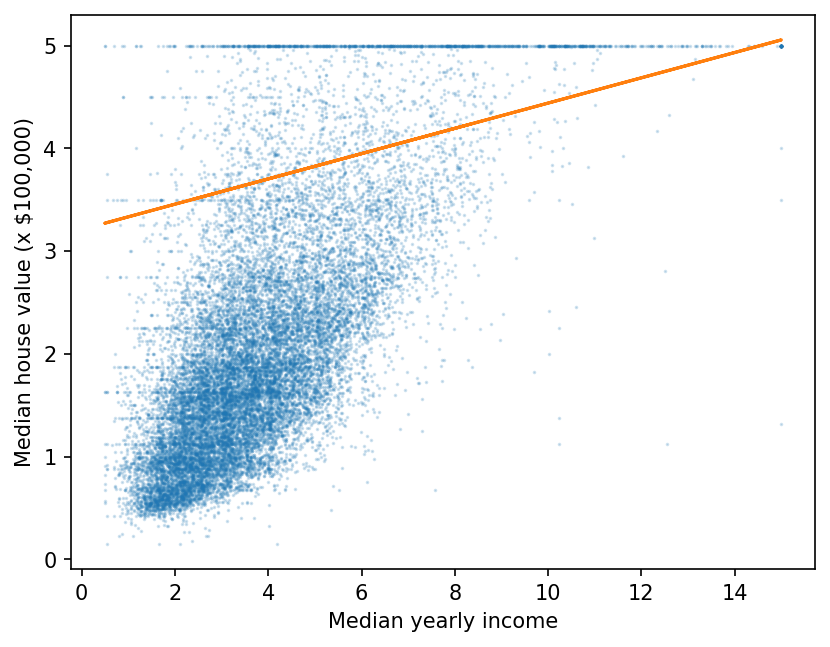

In [4]:
# Start with a random line
m = .123
b = 3.21
predictions = m * df.MedInc + b

plt.figure(dpi=150)
plt.xlabel('Median yearly income')  # Per city block
plt.ylabel('Median house value (x $100,000)')
plt.scatter(df.MedInc, y, s=.5, alpha=.2)
plt.plot(df.MedInc, predictions, color='C1')

In [5]:
errors = y - predictions
errors  # Some will be negative
squared_errors = errors ** 2
squared_errors
mse = squared_errors.mean()
mse

3.631503686313607

Not a great model, but it is just a random starting point.

Training the model then consists of changing the parameters to reduce error ("loss").

* How much error is due to *m* and how much due to *b*?
* And how do we figure out how to adjust them?

Let's use gradient descent, which means:
1. Partial derivative of loss function with respect to each parameter
2. Find slope (first derivative)
3. Move down slope a little (per learning rate)

Epoch 1 MSE: 3.631503686313607
Epoch 2 MSE: 1.6691906216216992
Epoch 3 MSE: 1.1786123554487216
Epoch 4 MSE: 1.055967788905477
Epoch 5 MSE: 1.0253066472696661
Epoch 6 MSE: 1.0176413618607132
Epoch 7 MSE: 1.015725040508475
Epoch 8 MSE: 1.0152459601704156
Epoch 9 MSE: 1.0151261900859008
Epoch 10 MSE: 1.015096247564772


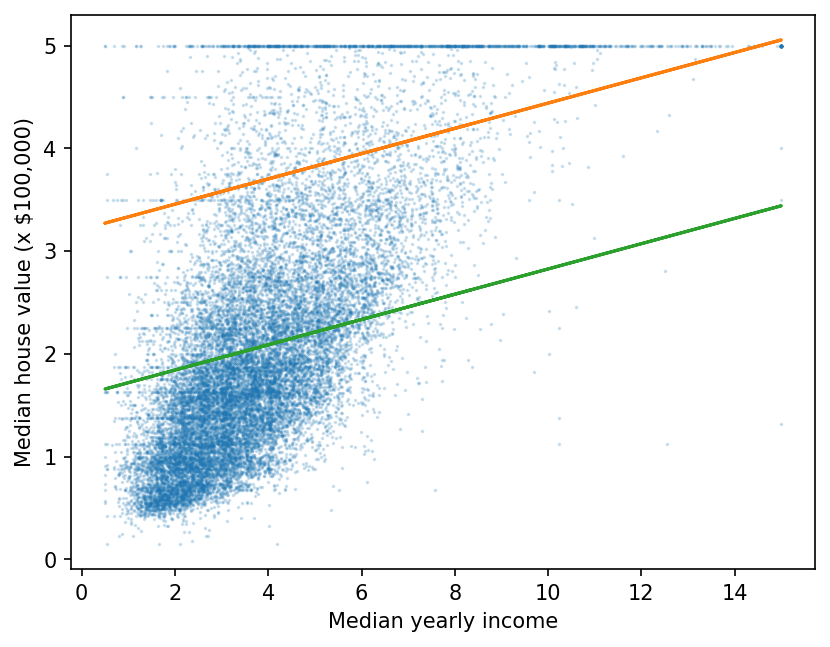

In [6]:
# Simpler version where we just figure out
# the direction to move each parameter visually.

# For loop for intercept (b, "bias")
learning_rate = .25
new_b = b
for epoch in range(10):
    new_predictions = m * df.MedInc + new_b
    new_mse = ((y - new_predictions) ** 2).mean()
    # Typical gradient descent step for intercept `b`
    gradient = -2 * (y - new_predictions).mean()
    new_b -= learning_rate * gradient  # Update intercept
    print('Epoch', epoch + 1, 'MSE:', new_mse)

plt.figure(dpi=150)
plt.xlabel('Median yearly income')
plt.ylabel('Median house value (x $100,000)')
plt.scatter(df.MedInc, y, s=.5, alpha=.2)
plt.plot(df.MedInc, predictions, color='C1')
plt.plot(df.MedInc, new_predictions, color='C2')

Epoch 1 MSE: 1.0150887619344897
Epoch 2 MSE: 0.9551372318335337
Epoch 3 MSE: 0.95483978232579
Epoch 4 MSE: 0.9548383065301013
Epoch 5 MSE: 0.9548382992079412
Epoch 6 MSE: 0.9548382991716121
Epoch 7 MSE: 0.9548382991714319
Epoch 8 MSE: 0.9548382991714311
Epoch 9 MSE: 0.9548382991714309
Epoch 10 MSE: 0.9548382991714311


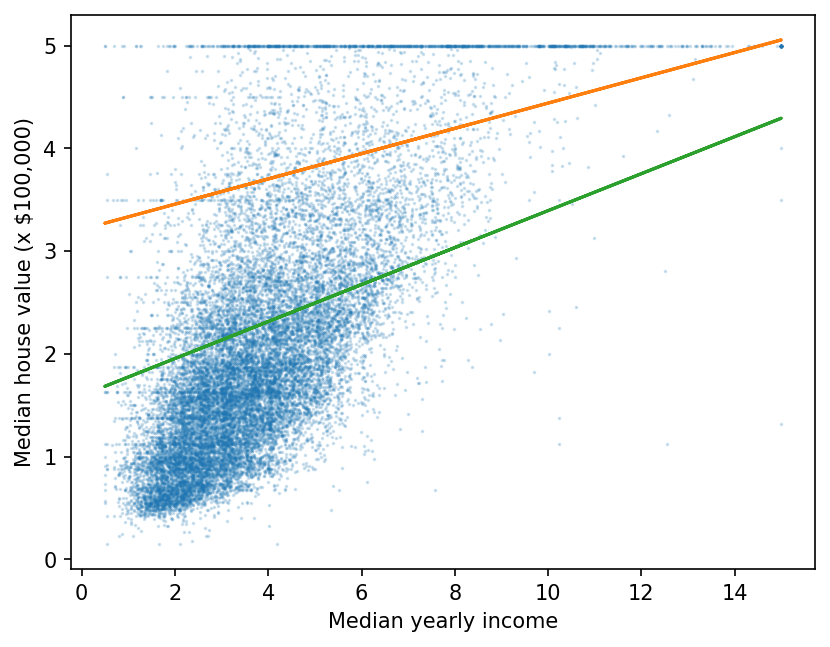

In [7]:
# Now let's minimize error according to m
# Using learned new_b

# m needs to increase a bit
learning_rate = .025
new_m = m
for epoch in range(10):
    new_predictions = new_m * df.MedInc + new_b
    new_mse = ((y - new_predictions) ** 2).mean()
    # Gradient descent step for `m`
    gradient = -2 * ((y - new_predictions) * df.MedInc).mean()
    new_m -= learning_rate * gradient  # Update slope
    print('Epoch', epoch + 1, 'MSE:', new_mse)

plt.figure(dpi=150)
plt.xlabel('Median yearly income')
plt.ylabel('Median house value (x $100,000)')
plt.scatter(df.MedInc, y, s=.5, alpha=.2)
plt.plot(df.MedInc, predictions, color='C1')
plt.plot(df.MedInc, new_predictions, color='C2')

## Basic idea of multiple layers

* Above gradient works fine for linear regression
* But what about more complicated models?
* What about non-linearity?
  * In this dataset, maybe the line should curve off to the right for high income

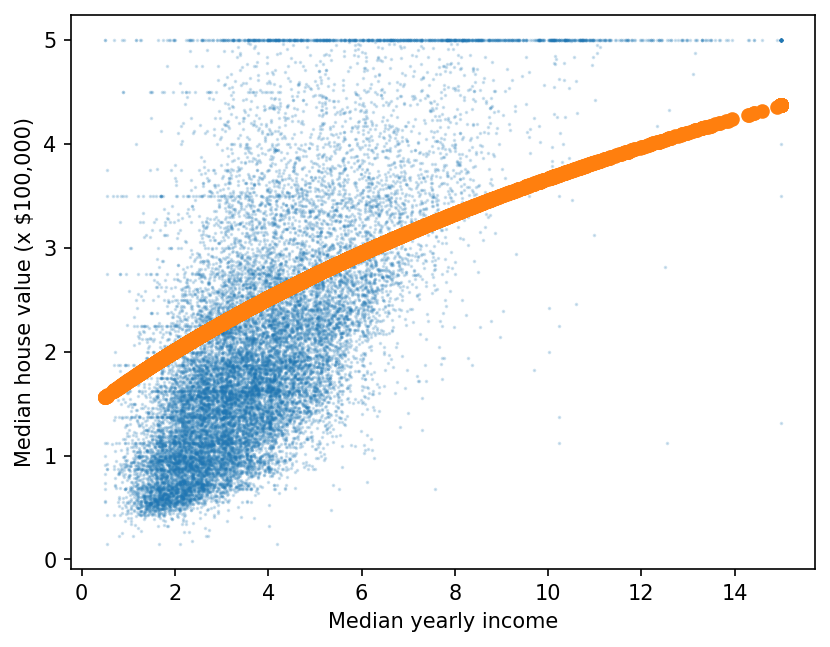

In [8]:
# Add an exponential function 
import numpy as np

predictions1 = new_m * df.MedInc + new_b
# 3 is another parameter we could fit!
predictions1 = 3 * np.log(predictions1)

plt.figure(dpi=150)
plt.xlabel('Median yearly income')
plt.ylabel('Median house value (x $100,000)')
plt.scatter(df.MedInc, y, s=.5, alpha=.2)
plt.scatter(df.MedInc, predictions1, color='C1')
plt.show()

## MLP in scikit-learn

"Multi-layer perceptron" (MLP) is this type of NN with only weights, biases, and activation functions.

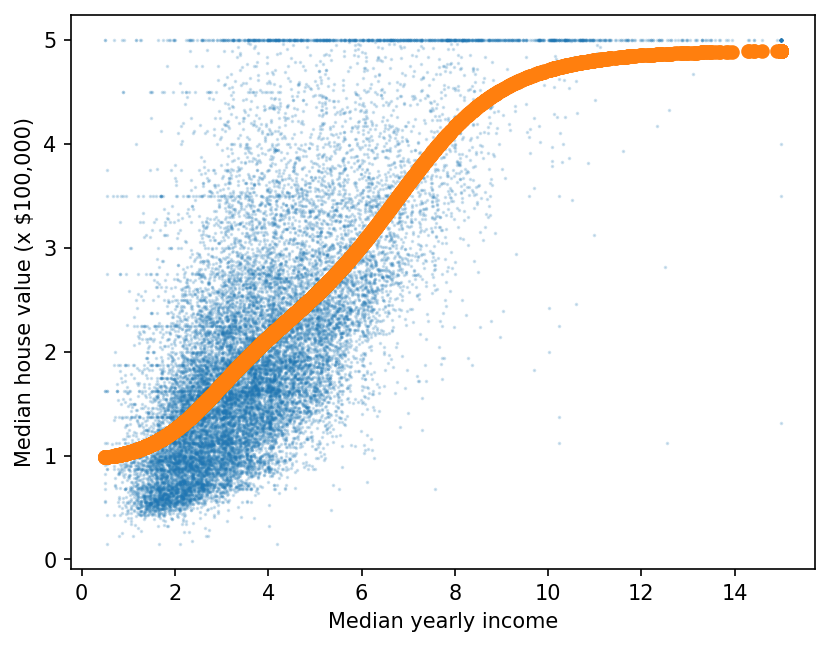

In [9]:
from sklearn import neural_network

features = ['MedInc']
model = neural_network.MLPRegressor([2, 2, 2], activation='logistic')

model.fit(df[features], y)
predictions = model.predict(df[features])
plt.figure(dpi=150)
plt.xlabel('Median yearly income')
plt.ylabel('Median house value (x $100,000)')
plt.scatter(df.MedInc, y, s=.5, alpha=.2)
plt.scatter(df.MedInc, predictions, color='C1')

# And of course we could use it in a
# cross-validation loop as well; just showing
# fit on all data here for illustration

## Image classification weight visualization

From: <https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html>

In [10]:
# Can take ~40 seconds to download :/
X, y = datasets.fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
# Let's scale data first; why? we would want to have initial random
# parameter guesses in the right range, and the learning rate to make sense.
# In the MNIST dataset, each image is represented as a 28x28 grayscale image, 
# where each pixel intensity ranges from 0 to 255
# Hence, dividing by 255.0 scales the data so that each pixel value lies within the [0, 1] range. 
norm_X = X / 255.0

<Figure size 960x720 with 0 Axes>

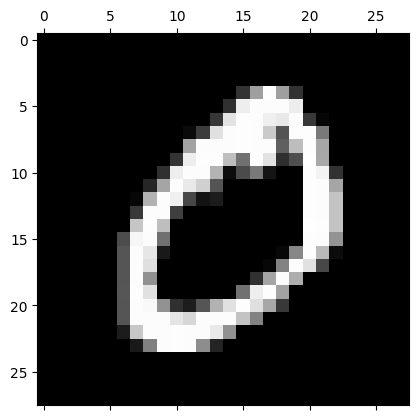

In [11]:
# 28x28 images of hand-drawn digits
plt.figure(dpi=150)
plt.matshow(norm_X[1].reshape(28, 28), cmap=plt.cm.gray)


In [12]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(
        norm_X, y, test_size=0.7)

model = neural_network.MLPClassifier([40],
    solver='sgd', learning_rate_init=.2)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[40], learning_rate_init=0.2, solver='sgd')

In [13]:
from sklearn import metrics

preds = model.predict(X_test)
test_kappa = metrics.cohen_kappa_score(y_test, preds)
print('Kappa:', test_kappa)

Kappa: 0.9587854873928559


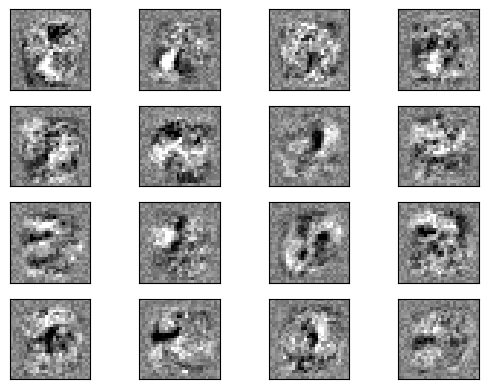

In [14]:
fig, axes = plt.subplots(4, 4)
# coefs_ is a list of weights per layer
# coefs_[0] weight matrix for the first layer. 
vmin = model.coefs_[0].min()
vmax = model.coefs_[0].max()

#axes.ravel(): axes is a 2D array of subplots. ravel() flattens this array so we can iterate over each subplot in a single loop.
#zip(): Since there are only 16 subplots (4x4 grid), zip will take the first 16 neurons out of 40 (shorter of the 2 lists).
#ax.matshow(): Displays the reshaped weights as a grayscale image, where the color scale is defined by vmin and vmax.
#Each coef is reshaped to a 28x28 matrix to match the original MNIST image shape
# These plots represent how the neuron’s weights correlate with each pixel.
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

# Observe that it learns to ignore the edges
# where there is no info, and each "feature"
# picks up a different part of the image!

# This is the basic idea of neural nets: they
# learn their own "features" from very low-level
# data, unlike tabular data where the data are
# already pretty high level and tree/similar
# approaches that don't learn their own features
# can work well.

### CNN aside

Imagine if we connected one parameter to each pixel?

Then if the 0 was drawn slightly to the side? The weight would no longer correspond to the "right" part of the digit.

Common problem in neural nets. What if an animal is in one corner of the image versus another? We'd still want to classify it the same.

What if a word was spoken earlier or later in an audio file? We would still want to recognize it.

[Jeff Clune CNN visualization paper](https://arxiv.org/pdf/1506.06579.pdf)